In [ ]:
# [Ctrl] + [Shift] + [P] : 가상화 환경 설정 시 사용함

# pip install pandas
# pip install tensorflow
# pip install scikit-learn
# pip install matplotlib

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(
    n_samples=1000,     # 데이터 샘플 수
    n_features=20,      # 특징(특성) 수
    n_classes=2,        # 클래스 수 (이진 분류)
    random_state=42     # 랜덤 시드 고정 (결과 재현 가능성 보장)
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # 첫 번째 은닉층
    Dense(8, activation='relu'),                                    # 두 번째 은닉층
    Dense(1, activation='sigmoid')                                  # 출력층 (이진 분류에서 사용)
])

c:\Project\tensor_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,       # 학습용 데이터와 레이블
    validation_split=0.2,   # 검증 데이터 비율 (학습 데이터의 20%)
    epochs=20,              # 학습 반복 횟수
    batch_size=32,          # 한 번의 학습에서 사용하는 데이터 샘플 수
    verbose=1               # 학습 진행 상태 출력
)
# 실행 결과 : 계속 개선되어가고 있음

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.3943 - val_accuracy: 0.8687 - val_loss: 0.3456
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8465 - loss: 0.3671 - val_accuracy: 0.8750 - val_loss: 0.3302
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8596 - loss: 0.3846 - val_accuracy: 0.8875 - val_loss: 0.3189
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.3533 - val_accuracy: 0.8875 - val_loss: 0.3070
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8817 - loss: 0.3149 - val_accuracy: 0.8875 - val_loss: 0.2976
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8649 - loss: 0.3238 - val_accuracy: 0.8938 - val_loss: 0.2922
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8638 - loss: 0.3186 - val_accuracy: 0.8938 - val_loss: 0.2860
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8809 - loss: 0.3139 - val_accuracy: 0.8875 - val_loss:

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8222 - loss: 0.4201 
테스트 손실: 0.3864, 테스트 정확도: 0.8400


In [9]:

predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
예측 결과: [[0.64728594]
 [0.6433463 ]
 [0.6464683 ]
 [0.91110724]
 [0.8422669 ]]


In [10]:
# 이진 분류
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [11]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=15, 
                           n_redundant=5, 
                           random_state=42)

In [12]:
# 70 : 15 : 15
X_train, X_temp, y_train, y_temp = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp,
                                                y_temp,
                                                test_size=0.5,
                                                random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),   # 입력층
    tf.keras.layers.Dense(64, activation='relu'),       # 첫 번째 은닉층

    tf.keras.layers.Dropout(0.5),                       # 과적합 방지를 위한
    
    tf.keras.layers.Dense(32, activation='relu'),       # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid')      # 출력층 (Sigmoid 활성화 함수)
])

In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',       # 이진 분류 손실 함수
              metrics=['accuracy'])

In [16]:
# 과적합 방지
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])
# 출력 결과 : 50번 다 안 했는데 30번대 정도에서 멈춤 -> 왜? (val_loss 개선 X) 과적합 방지 콜백이 작동했기 때문

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5588 - loss: 0.7144 - val_accuracy: 0.7267 - val_loss: 0.6195
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6477 - loss: 0.6296 - val_accuracy: 0.8600 - val_loss: 0.5250
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.5511 - val_accuracy: 0.8800 - val_loss: 0.4449
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7773 - loss: 0.4905 - val_accuracy: 0.8800 - val_loss: 0.3781
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8370 - loss: 0.4319 - val_accuracy: 0.9067 - val_loss: 0.3235
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8505 - loss: 0.4052 - val_accuracy: 0.9200 - val_loss: 0.2823
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8445 - loss: 0.3778 - val_accuracy: 0.9267 - val_loss: 0.2431
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8464 - loss: 0.3325 - val_accuracy: 0.9333 - val_loss:

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9191 - loss: 0.1989 
Test Loss: 0.1781, Test Accuracy: 0.9200


In [19]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        79
           1       0.92      0.92      0.92        71

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



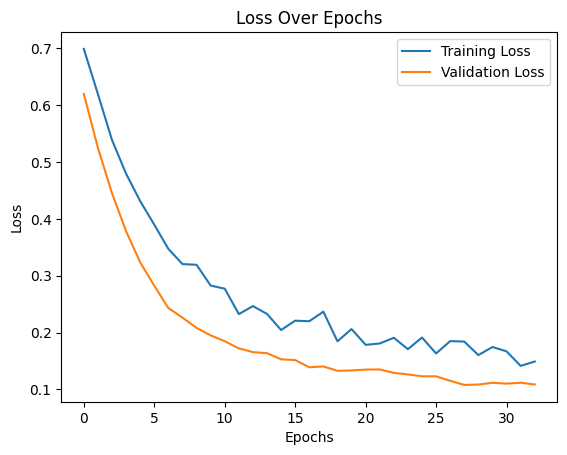

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

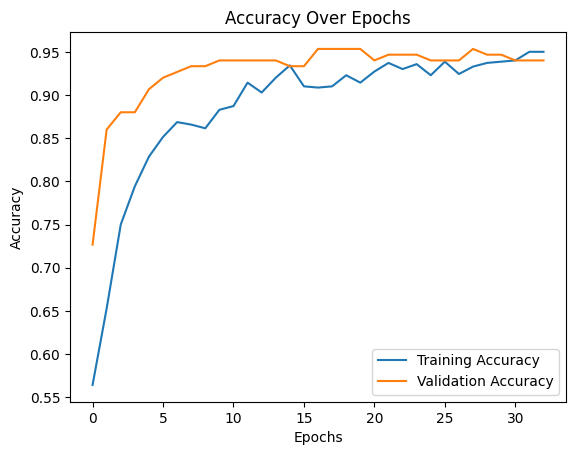

In [23]:
# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()